<a href="https://colab.research.google.com/github/poojayadav85/Matplotlib-numpy-Analysis/blob/main/ZomatoDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT THE LIBRARIES

pandas is used for data manipulation and Analysis.

numpy is used for numerical operation & scientific calculation.

matplotlib,pyplot and seaborn are used for data visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CREATE THE DATAFRAME

In [2]:
dataset = pd.read_csv("/content/Zomato data .csv")
print(dataset)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [3]:
dataset

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
dataset.shape

(148, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


convert the data type of column-Rate

In [6]:
def handleRate(value):
  value = str(value).split('/')
  value = value[0];
  return float(value)

  dataset['rate'] = dataset['rate'].apply(handleRate)
  print(dataset.head(5))

TYPE OF **RESTURANTS**

Text(0.5, 0, 'type of Restaurant')

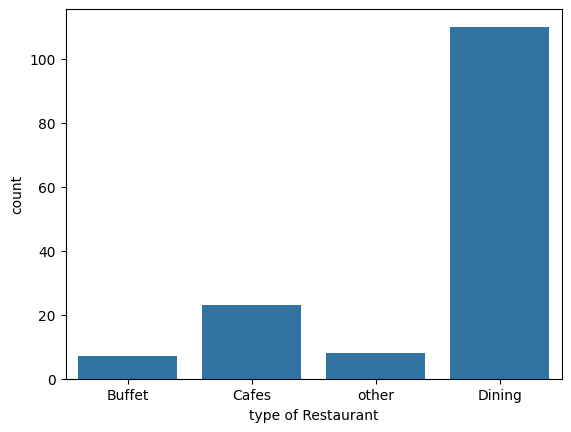

In [7]:
sns.countplot(x=dataset['listed_in(type)'])
plt.xlabel("type of Restaurant")

Conclusion - majority of the restaurant falls in dinning **category**

In [ ]:
grouped_data = dataset.groupby('listed_in(type)')['votes'].sum()
result = dataset({'votes':grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("votes", c="red", size=20)

TypeError: 'DataFrame' object is not callable

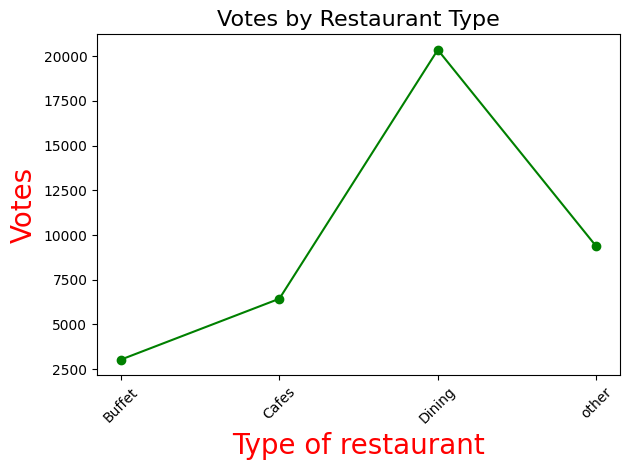

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_data = dataset.groupby('listed_in(type)')['votes'].sum()
result = grouped_data.reset_index()  # Converts Series to DataFrame

# Now plot
plt.plot(result['listed_in(type)'], result['votes'], c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)
plt.title("Votes by Restaurant Type", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


conclusion - dinning restaurants has received maximum votes

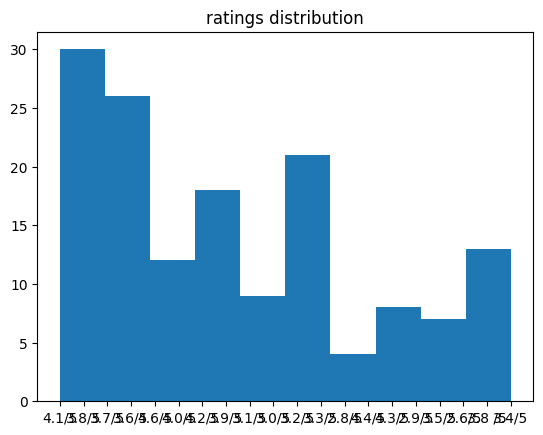

In [9]:
plt.hist(dataset['rate'],bins= 10)
plt.title("ratings distribution")
plt.show()

In [10]:
dataset.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

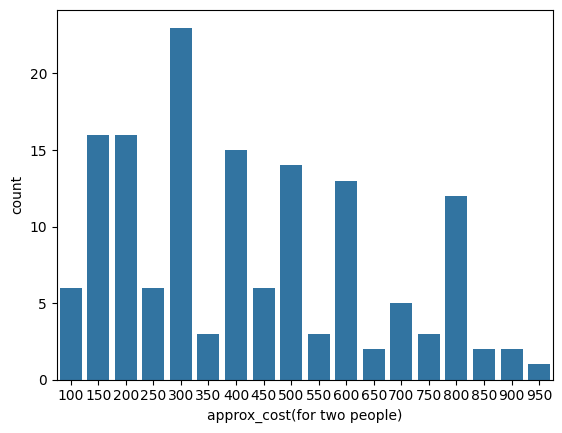

In [11]:
couple_data=dataset['approx_cost(for two people)']
sns.countplot(x=couple_data)

conclusion - the majority of couples preffer restuarants with an approximate cost of 300 rupees.

Which mode receives maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

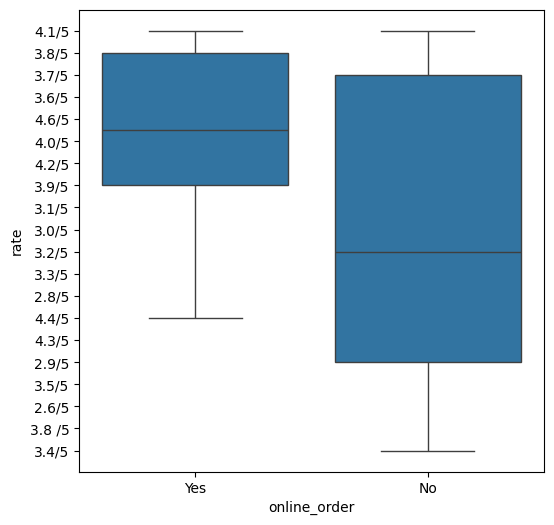

In [12]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y= 'rate', data = dataset)

conclusion - offline order received lower rating in comparison to online order

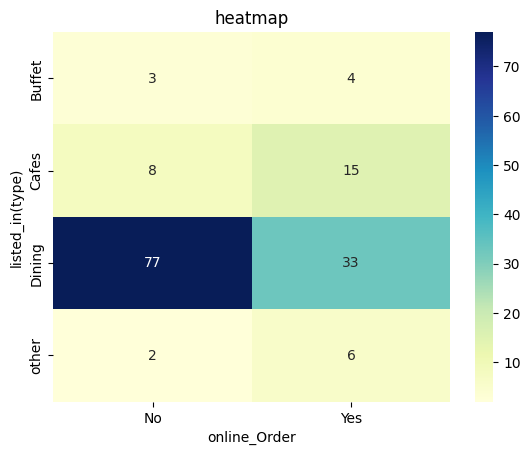

In [13]:
pivot_table = dataset.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("heatmap")
plt.xlabel("online_Order")
plt.ylabel("listed_in(type)")
plt.show()

Conclusion- Dinning restaurants Primarily accepts offine orders, whereas cafe primarily receive online orders. this suggests that clients prefers orders in person at restaurants, but prefer online odering at cafes.